In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [ ]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [7]:
# print(test_new.head())

In [71]:
# multivariate_column_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
#                            'RWWIHOA_MWT0','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
univariate_column_label=['AEDAHO_T9_V2']

multivariate_column_label=['AEDATZ_HO_V0', 'AEWIHO_T9AV2','AEDAHO_T9_V2']
multivariate_data=test_new.iloc[500:24999][multivariate_column_label] #just for checking whether it is working or not

In [72]:
multivariate_data=multivariate_data.loc[::-1]

In [73]:
print(multivariate_data.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-04-11 11:29:00     29.099978     64.576255     42.292350
2019-04-11 11:30:00     30.584083     64.560526     42.108748
2019-04-11 11:31:00     32.296527     64.542595     42.343193
2019-04-11 11:32:00     34.384378     64.795520     42.480315
2019-04-11 11:33:00     36.275050     64.671260     42.305187


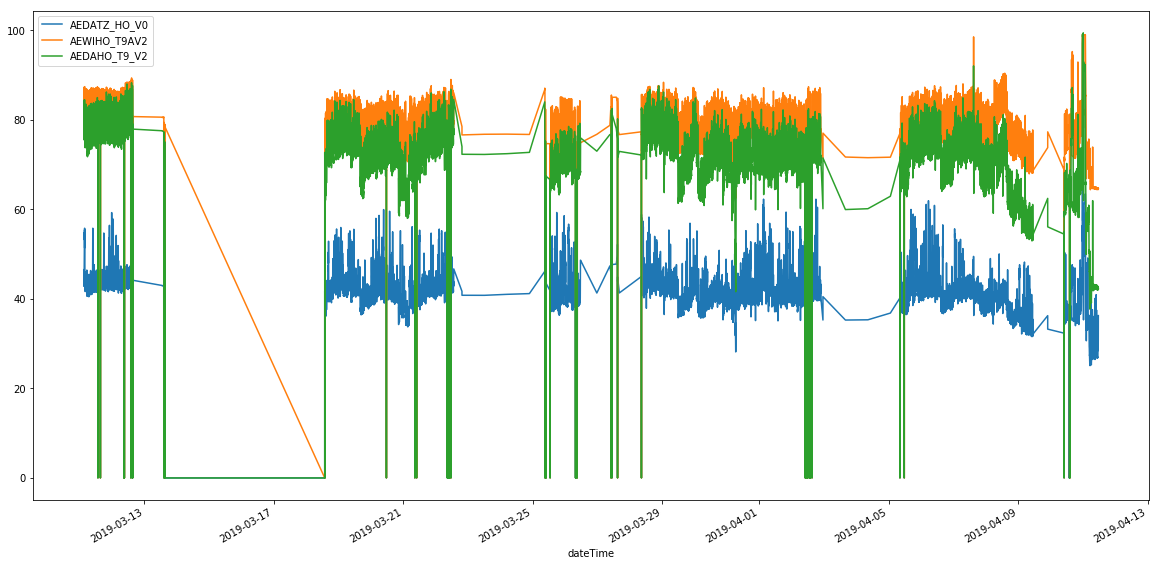

In [74]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [75]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)

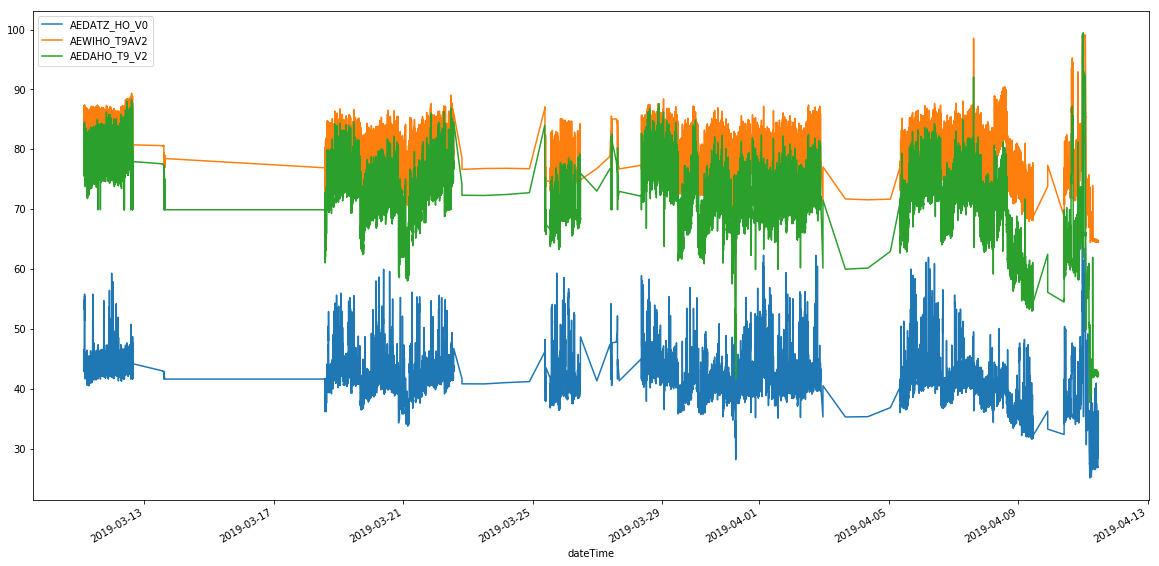

In [76]:
multivariate_data_mean.plot()
plt.show()

In [77]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [78]:
print(df_normalized.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEDAHO_T9_V2
dateTime                                                     
2019-04-11 11:29:00      0.094191      0.057240      0.073753
2019-04-11 11:30:00      0.129098      0.056810      0.070778
2019-04-11 11:31:00      0.169376      0.056319      0.074577
2019-04-11 11:32:00      0.218484      0.063239      0.076799
2019-04-11 11:33:00      0.262954      0.059839      0.073961


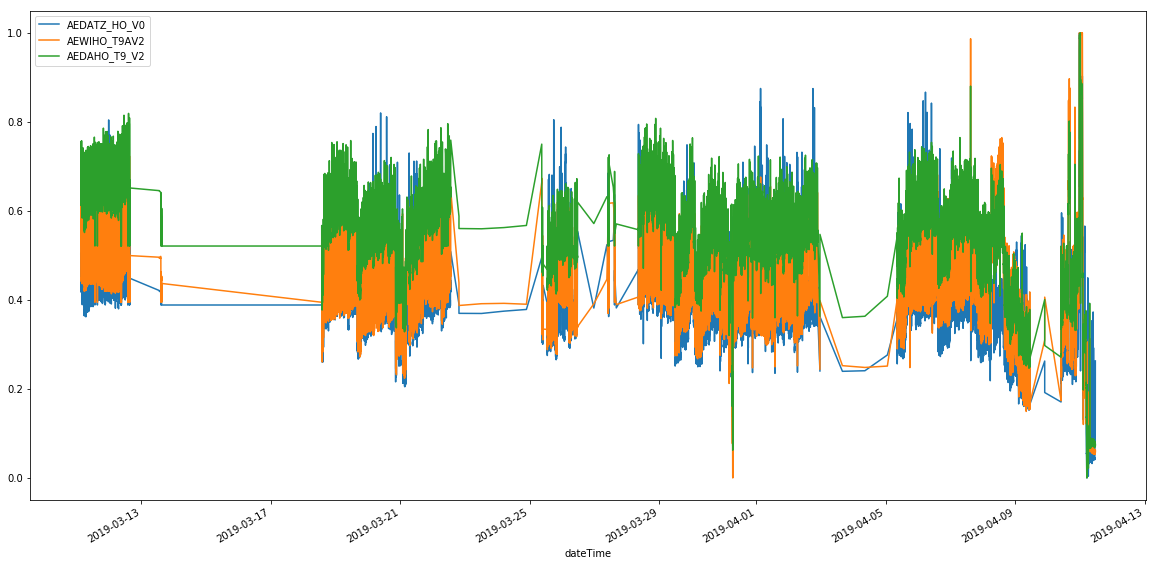

In [79]:
df_normalized.plot()
plt.show()

In [80]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(df_normalized)

NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  24499
Number of Elements for training:  22049
(22049, 3)
(2450, 3)


In [81]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [82]:
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_1
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [83]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm, Y_op_cnn_lstm = split_sequence(multiple_ip_train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

In [84]:
print('X_ip_cnn_lstm shape: ',X_ip_cnn_lstm.shape,'\tX_ip_cnn_lstm size: ',X_ip_cnn_lstm.size,'\tX_ip_cnn_lstm dimension: ',X_ip_cnn_lstm.ndim)
print('Y_op_cnn_lstm shape: ',Y_op_cnn_lstm.shape,'\tY_op_cnn_lstm size: ',Y_op_cnn_lstm.size,'\tY_op_cnn_lstm dimension: ',Y_op_cnn_lstm.ndim)

X_ip_cnn_lstm shape:  (22045, 4, 2) 	X_ip_cnn_lstm size:  176360 	X_ip_cnn_lstm dimension:  3
Y_op_cnn_lstm shape:  (22045,) 	Y_op_cnn_lstm size:  22045 	Y_op_cnn_lstm dimension:  1


In [85]:
n_features = X_ip_cnn_lstm.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm = X_ip_cnn_lstm.reshape((X_ip_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))

In [86]:
print('train_ip_cnn_lstm shape: ',train_ip_cnn_lstm.shape,'\ttrain_ip_cnn_lstm size: ',
      train_ip_cnn_lstm.size,'\ttrain_ip_cnn_lstm dimension: ',train_ip_cnn_lstm.ndim)

train_ip_cnn_lstm shape:  (22045, 2, 2, 2) 	train_ip_cnn_lstm size:  176360 	train_ip_cnn_lstm dimension:  4


In [87]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=30

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
trained_model=cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5', save_best_only=True)])

Epoch 1/30
22045/22045 [==============================] - 3s 156us/step - loss: 0.0049 - acc: 0.0000e+00
Epoch 2/30
 1344/22045 [>.............................] - ETA: 2s - loss: 0.0024 - acc: 0.0000e+00

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/keras/callbacks.py:432: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


22045/22045 [==============================] - 2s 100us/step - loss: 0.0022 - acc: 0.0000e+00
Epoch 3/30
22045/22045 [==============================] - 3s 117us/step - loss: 0.0020 - acc: 0.0000e+00
Epoch 4/30
22045/22045 [==============================] - 3s 121us/step - loss: 0.0018 - acc: 0.0000e+00
Epoch 5/30
22045/22045 [==============================] - 2s 100us/step - loss: 0.0017 - acc: 0.0000e+00
Epoch 6/30
22045/22045 [==============================] - 2s 101us/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 7/30
22045/22045 [==============================] - 2s 100us/step - loss: 0.0016 - acc: 0.0000e+00
Epoch 8/30
22045/22045 [==============================] - 2s 102us/step - loss: 0.0015 - acc: 0.0000e+00
Epoch 9/30
22045/22045 [==============================] - 2s 104us/step - loss: 0.0015 - acc: 0.0000e+00
Epoch 10/30
22045/22045 [==============================] - 2s 103us/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 11/30
22045/22045 [==============================] - 2s 103

In [88]:
X_CNN_Lstm_test, y_CNN_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)

x_input = X_CNN_Lstm_test.reshape((X_CNN_Lstm_test.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test.shape[-1]))

In [89]:
# from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5')

yhat = cnn_lstm.predict(x_input, verbose=1)
print(yhat)

2446/2446 [==============================] - 0s 154us/step
[[0.38104123]
 [0.37349895]
 [0.36991078]
 ...
 [0.15025167]
 [0.18592775]
 [0.24328232]]


In [90]:
print(y_CNN_Lstm_test)

[0.35607567 0.36254822 0.35242435 ... 0.0745769  0.07679891 0.07396101]


In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test,yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

mean squared error:  0.004608917611278586
RMSE Error:  0.06788900950285388


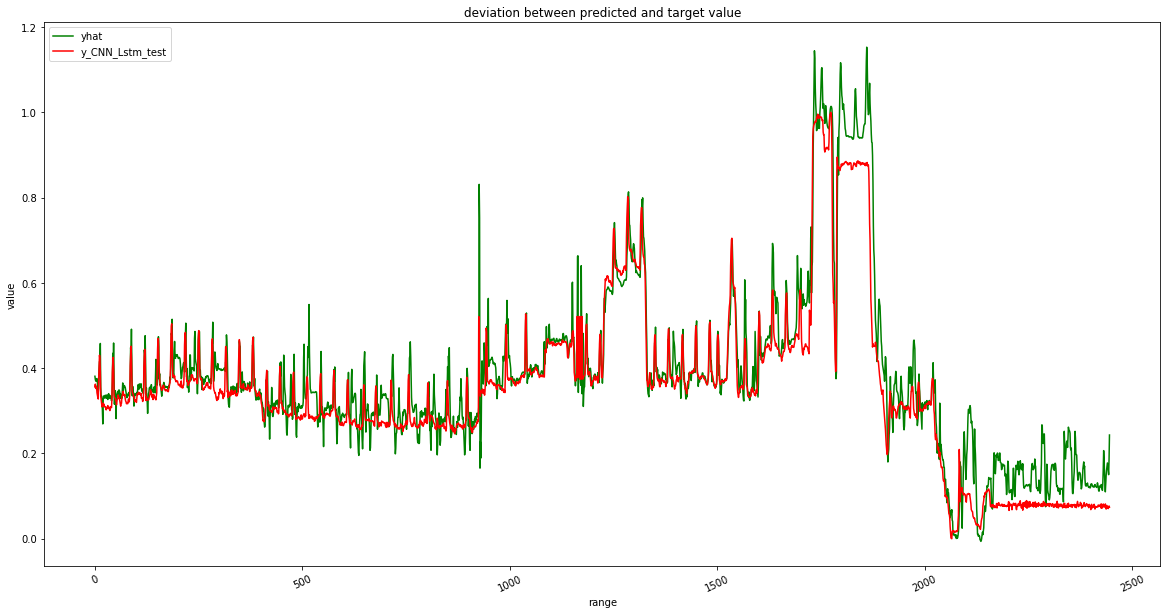

In [92]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='green')
plt.plot(y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'y_CNN_Lstm_test'], loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Unnormalize data to test

In [93]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=multivariate_data_mean[val].max()
    q=[val,x]
    max_array.append(q)

In [94]:
target_column_max_value=max_array[-1][-1]

In [95]:
target_column_max_value

99.4516393320581

In [96]:
unnormalized_yhat=yhat*target_column_max_value
unnormalized_y_CNN_Lstm_test=y_CNN_Lstm_test*target_column_max_value

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_y_CNN_Lstm_test,unnormalized_yhat)
print('Mean Absolute Error: ',Error_1)

mean squared error:  45.58508669867874
RMSE Error:  6.751672881492315
Mean Absolute Error:  4.414332137214763


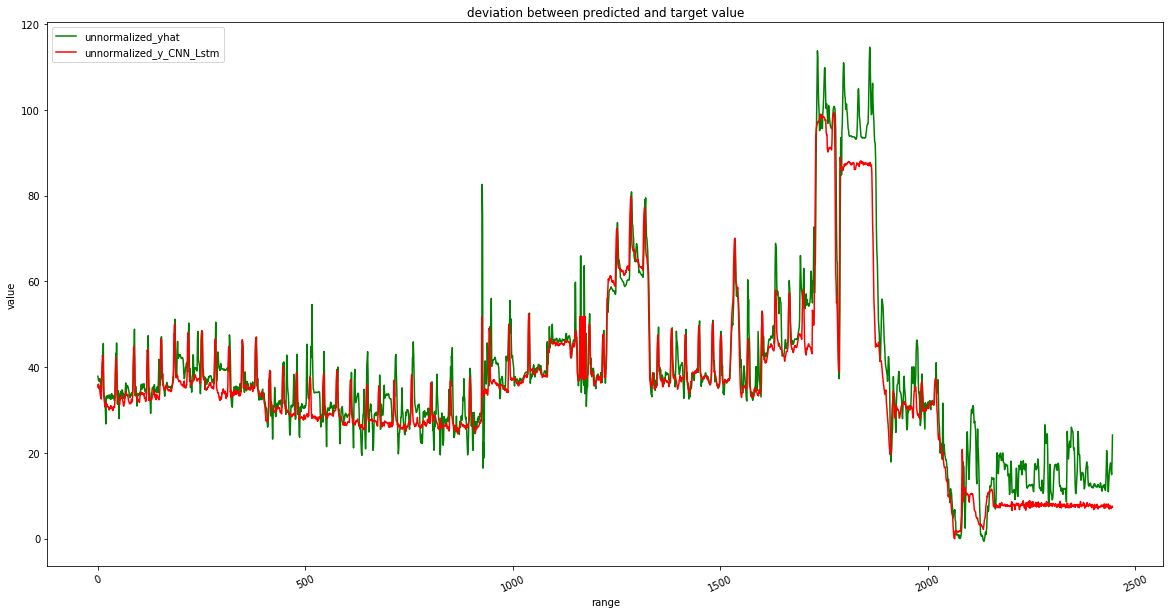

In [98]:
plt.plot(unnormalized_yhat,color='green')
plt.plot(unnormalized_y_CNN_Lstm_test,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_CNN_Lstm'], loc='upper left')
plt.show()

In [52]:
for index,values in enumerate(multivariate_data.index):
    print(index,'\t',values)

0 	 2019-03-11 03:15:00
1 	 2019-03-11 03:16:00
2 	 2019-03-11 03:17:00
3 	 2019-03-11 03:18:00
4 	 2019-03-11 03:19:00
5 	 2019-03-11 03:20:00
6 	 2019-03-11 03:21:00
7 	 2019-03-11 03:22:00
8 	 2019-03-11 03:23:00
9 	 2019-03-11 03:24:00
10 	 2019-03-11 03:25:00
11 	 2019-03-11 03:26:00
12 	 2019-03-11 03:27:00
13 	 2019-03-11 03:28:00
14 	 2019-03-11 03:29:00
15 	 2019-03-11 03:30:00
16 	 2019-03-11 03:31:00
17 	 2019-03-11 03:32:00
18 	 2019-03-11 03:33:00
19 	 2019-03-11 03:34:00
20 	 2019-03-11 03:35:00
21 	 2019-03-11 03:36:00
22 	 2019-03-11 03:37:00
23 	 2019-03-11 03:38:00
24 	 2019-03-11 03:39:00
25 	 2019-03-11 03:40:00
26 	 2019-03-11 03:41:00
27 	 2019-03-11 03:42:00
28 	 2019-03-11 03:43:00
29 	 2019-03-11 03:44:00
30 	 2019-03-11 03:45:00
31 	 2019-03-11 03:46:00
32 	 2019-03-11 03:47:00
33 	 2019-03-11 03:48:00
34 	 2019-03-11 03:49:00
35 	 2019-03-11 03:50:00
36 	 2019-03-11 03:51:00
37 	 2019-03-11 03:52:00
38 	 2019-03-11 03:53:00
39 	 2019-03-11 03:54:00
40 	 2019-

647 	 2019-03-11 14:09:00
648 	 2019-03-11 14:10:00
649 	 2019-03-11 14:11:00
650 	 2019-03-11 14:12:00
651 	 2019-03-11 14:13:00
652 	 2019-03-11 14:14:00
653 	 2019-03-11 14:15:00
654 	 2019-03-11 14:16:00
655 	 2019-03-11 14:17:00
656 	 2019-03-11 14:18:00
657 	 2019-03-11 14:19:00
658 	 2019-03-11 14:20:00
659 	 2019-03-11 14:21:00
660 	 2019-03-11 14:22:00
661 	 2019-03-11 14:23:00
662 	 2019-03-11 14:24:00
663 	 2019-03-11 14:25:00
664 	 2019-03-11 14:26:00
665 	 2019-03-11 14:27:00
666 	 2019-03-11 14:28:00
667 	 2019-03-11 14:29:00
668 	 2019-03-11 14:30:00
669 	 2019-03-11 14:31:00
670 	 2019-03-11 14:32:00
671 	 2019-03-11 14:33:00
672 	 2019-03-11 14:34:00
673 	 2019-03-11 14:35:00
674 	 2019-03-11 14:36:00
675 	 2019-03-11 14:37:00
676 	 2019-03-11 14:38:00
677 	 2019-03-11 14:39:00
678 	 2019-03-11 14:40:00
679 	 2019-03-11 14:41:00
680 	 2019-03-11 14:42:00
681 	 2019-03-11 14:43:00
682 	 2019-03-11 15:30:00
683 	 2019-03-11 15:31:00
684 	 2019-03-11 15:32:00
685 	 2019-0

1313 	 2019-03-12 02:01:00
1314 	 2019-03-12 02:02:00
1315 	 2019-03-12 02:03:00
1316 	 2019-03-12 02:04:00
1317 	 2019-03-12 02:05:00
1318 	 2019-03-12 02:06:00
1319 	 2019-03-12 02:07:00
1320 	 2019-03-12 02:08:00
1321 	 2019-03-12 02:09:00
1322 	 2019-03-12 02:10:00
1323 	 2019-03-12 02:11:00
1324 	 2019-03-12 02:12:00
1325 	 2019-03-12 02:13:00
1326 	 2019-03-12 02:14:00
1327 	 2019-03-12 02:15:00
1328 	 2019-03-12 02:16:00
1329 	 2019-03-12 02:17:00
1330 	 2019-03-12 02:18:00
1331 	 2019-03-12 02:19:00
1332 	 2019-03-12 02:20:00
1333 	 2019-03-12 02:21:00
1334 	 2019-03-12 02:22:00
1335 	 2019-03-12 02:23:00
1336 	 2019-03-12 02:24:00
1337 	 2019-03-12 02:25:00
1338 	 2019-03-12 02:26:00
1339 	 2019-03-12 02:27:00
1340 	 2019-03-12 02:28:00
1341 	 2019-03-12 02:29:00
1342 	 2019-03-12 02:30:00
1343 	 2019-03-12 02:31:00
1344 	 2019-03-12 02:32:00
1345 	 2019-03-12 02:33:00
1346 	 2019-03-12 02:34:00
1347 	 2019-03-12 02:35:00
1348 	 2019-03-12 02:36:00
1349 	 2019-03-12 02:37:00
1

2147 	 2019-03-18 14:27:00
2148 	 2019-03-18 14:28:00
2149 	 2019-03-18 14:29:00
2150 	 2019-03-18 14:30:00
2151 	 2019-03-18 14:31:00
2152 	 2019-03-18 14:32:00
2153 	 2019-03-18 14:33:00
2154 	 2019-03-18 14:34:00
2155 	 2019-03-18 14:35:00
2156 	 2019-03-18 14:36:00
2157 	 2019-03-18 14:37:00
2158 	 2019-03-18 14:38:00
2159 	 2019-03-18 14:39:00
2160 	 2019-03-18 14:40:00
2161 	 2019-03-18 14:41:00
2162 	 2019-03-18 14:42:00
2163 	 2019-03-18 14:43:00
2164 	 2019-03-18 14:44:00
2165 	 2019-03-18 14:45:00
2166 	 2019-03-18 14:46:00
2167 	 2019-03-18 14:47:00
2168 	 2019-03-18 14:48:00
2169 	 2019-03-18 14:49:00
2170 	 2019-03-18 14:50:00
2171 	 2019-03-18 14:51:00
2172 	 2019-03-18 14:52:00
2173 	 2019-03-18 14:53:00
2174 	 2019-03-18 14:54:00
2175 	 2019-03-18 14:55:00
2176 	 2019-03-18 14:56:00
2177 	 2019-03-18 14:57:00
2178 	 2019-03-18 14:58:00
2179 	 2019-03-18 14:59:00
2180 	 2019-03-18 15:00:00
2181 	 2019-03-18 15:01:00
2182 	 2019-03-18 15:02:00
2183 	 2019-03-18 15:03:00
2

3146 	 2019-03-19 07:06:00
3147 	 2019-03-19 07:07:00
3148 	 2019-03-19 07:08:00
3149 	 2019-03-19 07:09:00
3150 	 2019-03-19 07:10:00
3151 	 2019-03-19 07:11:00
3152 	 2019-03-19 07:12:00
3153 	 2019-03-19 07:13:00
3154 	 2019-03-19 07:14:00
3155 	 2019-03-19 07:15:00
3156 	 2019-03-19 07:16:00
3157 	 2019-03-19 07:17:00
3158 	 2019-03-19 07:18:00
3159 	 2019-03-19 07:19:00
3160 	 2019-03-19 07:20:00
3161 	 2019-03-19 07:21:00
3162 	 2019-03-19 07:22:00
3163 	 2019-03-19 07:23:00
3164 	 2019-03-19 07:24:00
3165 	 2019-03-19 07:25:00
3166 	 2019-03-19 07:26:00
3167 	 2019-03-19 07:27:00
3168 	 2019-03-19 07:28:00
3169 	 2019-03-19 07:29:00
3170 	 2019-03-19 07:30:00
3171 	 2019-03-19 07:31:00
3172 	 2019-03-19 07:32:00
3173 	 2019-03-19 07:33:00
3174 	 2019-03-19 07:34:00
3175 	 2019-03-19 07:35:00
3176 	 2019-03-19 07:36:00
3177 	 2019-03-19 07:37:00
3178 	 2019-03-19 07:38:00
3179 	 2019-03-19 07:39:00
3180 	 2019-03-19 07:40:00
3181 	 2019-03-19 07:41:00
3182 	 2019-03-19 07:42:00
3

4146 	 2019-03-19 23:46:00
4147 	 2019-03-19 23:47:00
4148 	 2019-03-19 23:48:00
4149 	 2019-03-19 23:49:00
4150 	 2019-03-19 23:50:00
4151 	 2019-03-19 23:51:00
4152 	 2019-03-19 23:52:00
4153 	 2019-03-19 23:53:00
4154 	 2019-03-19 23:54:00
4155 	 2019-03-19 23:55:00
4156 	 2019-03-19 23:56:00
4157 	 2019-03-19 23:57:00
4158 	 2019-03-19 23:58:00
4159 	 2019-03-19 23:59:00
4160 	 2019-03-20 00:00:00
4161 	 2019-03-20 00:01:00
4162 	 2019-03-20 00:02:00
4163 	 2019-03-20 00:03:00
4164 	 2019-03-20 00:04:00
4165 	 2019-03-20 00:05:00
4166 	 2019-03-20 00:06:00
4167 	 2019-03-20 00:07:00
4168 	 2019-03-20 00:08:00
4169 	 2019-03-20 00:09:00
4170 	 2019-03-20 00:10:00
4171 	 2019-03-20 00:11:00
4172 	 2019-03-20 00:12:00
4173 	 2019-03-20 00:13:00
4174 	 2019-03-20 00:14:00
4175 	 2019-03-20 00:15:00
4176 	 2019-03-20 00:16:00
4177 	 2019-03-20 00:17:00
4178 	 2019-03-20 00:18:00
4179 	 2019-03-20 00:19:00
4180 	 2019-03-20 00:20:00
4181 	 2019-03-20 00:21:00
4182 	 2019-03-20 00:22:00
4

4979 	 2019-03-20 13:40:00
4980 	 2019-03-20 13:41:00
4981 	 2019-03-20 13:42:00
4982 	 2019-03-20 13:43:00
4983 	 2019-03-20 13:44:00
4984 	 2019-03-20 13:45:00
4985 	 2019-03-20 13:46:00
4986 	 2019-03-20 13:47:00
4987 	 2019-03-20 13:48:00
4988 	 2019-03-20 13:49:00
4989 	 2019-03-20 13:50:00
4990 	 2019-03-20 13:51:00
4991 	 2019-03-20 13:52:00
4992 	 2019-03-20 13:53:00
4993 	 2019-03-20 13:54:00
4994 	 2019-03-20 13:55:00
4995 	 2019-03-20 13:56:00
4996 	 2019-03-20 13:57:00
4997 	 2019-03-20 13:58:00
4998 	 2019-03-20 13:59:00
4999 	 2019-03-20 14:00:00
5000 	 2019-03-20 14:01:00
5001 	 2019-03-20 14:02:00
5002 	 2019-03-20 14:03:00
5003 	 2019-03-20 14:04:00
5004 	 2019-03-20 14:05:00
5005 	 2019-03-20 14:06:00
5006 	 2019-03-20 14:07:00
5007 	 2019-03-20 14:08:00
5008 	 2019-03-20 14:09:00
5009 	 2019-03-20 14:10:00
5010 	 2019-03-20 14:11:00
5011 	 2019-03-20 14:12:00
5012 	 2019-03-20 14:13:00
5013 	 2019-03-20 14:14:00
5014 	 2019-03-20 14:15:00
5015 	 2019-03-20 14:16:00
5

5813 	 2019-03-21 03:34:00
5814 	 2019-03-21 03:35:00
5815 	 2019-03-21 03:36:00
5816 	 2019-03-21 03:37:00
5817 	 2019-03-21 03:38:00
5818 	 2019-03-21 03:39:00
5819 	 2019-03-21 03:40:00
5820 	 2019-03-21 03:41:00
5821 	 2019-03-21 03:42:00
5822 	 2019-03-21 03:43:00
5823 	 2019-03-21 03:44:00
5824 	 2019-03-21 03:45:00
5825 	 2019-03-21 03:46:00
5826 	 2019-03-21 03:47:00
5827 	 2019-03-21 03:48:00
5828 	 2019-03-21 03:49:00
5829 	 2019-03-21 03:50:00
5830 	 2019-03-21 03:51:00
5831 	 2019-03-21 03:52:00
5832 	 2019-03-21 03:53:00
5833 	 2019-03-21 03:54:00
5834 	 2019-03-21 03:55:00
5835 	 2019-03-21 03:56:00
5836 	 2019-03-21 03:57:00
5837 	 2019-03-21 03:58:00
5838 	 2019-03-21 03:59:00
5839 	 2019-03-21 04:00:00
5840 	 2019-03-21 04:01:00
5841 	 2019-03-21 04:02:00
5842 	 2019-03-21 04:03:00
5843 	 2019-03-21 04:04:00
5844 	 2019-03-21 04:05:00
5845 	 2019-03-21 04:06:00
5846 	 2019-03-21 04:07:00
5847 	 2019-03-21 04:08:00
5848 	 2019-03-21 04:09:00
5849 	 2019-03-21 04:10:00
5

6812 	 2019-03-21 20:14:00
6813 	 2019-03-21 20:15:00
6814 	 2019-03-21 20:16:00
6815 	 2019-03-21 20:17:00
6816 	 2019-03-21 20:18:00
6817 	 2019-03-21 20:19:00
6818 	 2019-03-21 20:20:00
6819 	 2019-03-21 20:21:00
6820 	 2019-03-21 20:22:00
6821 	 2019-03-21 20:23:00
6822 	 2019-03-21 20:24:00
6823 	 2019-03-21 20:25:00
6824 	 2019-03-21 20:26:00
6825 	 2019-03-21 20:27:00
6826 	 2019-03-21 20:28:00
6827 	 2019-03-21 20:29:00
6828 	 2019-03-21 20:30:00
6829 	 2019-03-21 20:31:00
6830 	 2019-03-21 20:32:00
6831 	 2019-03-21 20:33:00
6832 	 2019-03-21 20:34:00
6833 	 2019-03-21 20:35:00
6834 	 2019-03-21 20:36:00
6835 	 2019-03-21 20:37:00
6836 	 2019-03-21 20:38:00
6837 	 2019-03-21 20:39:00
6838 	 2019-03-21 20:40:00
6839 	 2019-03-21 20:41:00
6840 	 2019-03-21 20:42:00
6841 	 2019-03-21 20:43:00
6842 	 2019-03-21 20:44:00
6843 	 2019-03-21 20:45:00
6844 	 2019-03-21 20:46:00
6845 	 2019-03-21 20:47:00
6846 	 2019-03-21 20:48:00
6847 	 2019-03-21 20:49:00
6848 	 2019-03-21 20:50:00
6

7646 	 2019-03-22 11:28:00
7647 	 2019-03-22 11:29:00
7648 	 2019-03-22 11:30:00
7649 	 2019-03-22 11:31:00
7650 	 2019-03-22 11:32:00
7651 	 2019-03-22 11:33:00
7652 	 2019-03-22 11:34:00
7653 	 2019-03-22 11:35:00
7654 	 2019-03-22 11:36:00
7655 	 2019-03-22 11:37:00
7656 	 2019-03-22 11:38:00
7657 	 2019-03-22 11:39:00
7658 	 2019-03-22 11:40:00
7659 	 2019-03-22 11:41:00
7660 	 2019-03-22 11:42:00
7661 	 2019-03-22 11:43:00
7662 	 2019-03-22 11:44:00
7663 	 2019-03-22 11:45:00
7664 	 2019-03-22 11:46:00
7665 	 2019-03-22 11:47:00
7666 	 2019-03-22 11:48:00
7667 	 2019-03-22 11:49:00
7668 	 2019-03-22 11:50:00
7669 	 2019-03-22 11:51:00
7670 	 2019-03-22 11:52:00
7671 	 2019-03-22 11:53:00
7672 	 2019-03-22 11:54:00
7673 	 2019-03-22 11:55:00
7674 	 2019-03-22 11:56:00
7675 	 2019-03-22 11:57:00
7676 	 2019-03-22 11:58:00
7677 	 2019-03-22 11:59:00
7678 	 2019-03-22 12:00:00
7679 	 2019-03-22 12:01:00
7680 	 2019-03-22 12:02:00
7681 	 2019-03-22 12:03:00
7682 	 2019-03-22 12:04:00
7

8479 	 2019-03-25 23:52:00
8480 	 2019-03-25 23:53:00
8481 	 2019-03-25 23:54:00
8482 	 2019-03-25 23:55:00
8483 	 2019-03-25 23:56:00
8484 	 2019-03-25 23:57:00
8485 	 2019-03-25 23:58:00
8486 	 2019-03-25 23:59:00
8487 	 2019-03-26 00:00:00
8488 	 2019-03-26 00:01:00
8489 	 2019-03-26 00:02:00
8490 	 2019-03-26 00:03:00
8491 	 2019-03-26 00:04:00
8492 	 2019-03-26 00:05:00
8493 	 2019-03-26 00:06:00
8494 	 2019-03-26 00:07:00
8495 	 2019-03-26 00:08:00
8496 	 2019-03-26 00:09:00
8497 	 2019-03-26 00:10:00
8498 	 2019-03-26 00:11:00
8499 	 2019-03-26 00:12:00
8500 	 2019-03-26 00:13:00
8501 	 2019-03-26 00:14:00
8502 	 2019-03-26 00:15:00
8503 	 2019-03-26 00:16:00
8504 	 2019-03-26 00:17:00
8505 	 2019-03-26 00:18:00
8506 	 2019-03-26 00:19:00
8507 	 2019-03-26 00:20:00
8508 	 2019-03-26 00:21:00
8509 	 2019-03-26 00:22:00
8510 	 2019-03-26 00:23:00
8511 	 2019-03-26 00:24:00
8512 	 2019-03-26 00:25:00
8513 	 2019-03-26 00:26:00
8514 	 2019-03-26 00:27:00
8515 	 2019-03-26 00:28:00
8

9479 	 2019-03-28 13:41:00
9480 	 2019-03-28 13:42:00
9481 	 2019-03-28 13:43:00
9482 	 2019-03-28 13:44:00
9483 	 2019-03-28 13:45:00
9484 	 2019-03-28 13:46:00
9485 	 2019-03-28 13:47:00
9486 	 2019-03-28 13:48:00
9487 	 2019-03-28 13:49:00
9488 	 2019-03-28 13:50:00
9489 	 2019-03-28 13:51:00
9490 	 2019-03-28 13:52:00
9491 	 2019-03-28 13:53:00
9492 	 2019-03-28 13:54:00
9493 	 2019-03-28 13:55:00
9494 	 2019-03-28 13:56:00
9495 	 2019-03-28 13:57:00
9496 	 2019-03-28 13:58:00
9497 	 2019-03-28 13:59:00
9498 	 2019-03-28 14:00:00
9499 	 2019-03-28 14:01:00
9500 	 2019-03-28 14:02:00
9501 	 2019-03-28 14:03:00
9502 	 2019-03-28 14:04:00
9503 	 2019-03-28 14:05:00
9504 	 2019-03-28 14:06:00
9505 	 2019-03-28 14:07:00
9506 	 2019-03-28 14:08:00
9507 	 2019-03-28 14:09:00
9508 	 2019-03-28 14:10:00
9509 	 2019-03-28 14:11:00
9510 	 2019-03-28 14:12:00
9511 	 2019-03-28 14:13:00
9512 	 2019-03-28 14:14:00
9513 	 2019-03-28 14:15:00
9514 	 2019-03-28 14:16:00
9515 	 2019-03-28 14:17:00
9

10239 	 2019-03-29 02:21:00
10240 	 2019-03-29 02:22:00
10241 	 2019-03-29 02:23:00
10242 	 2019-03-29 02:24:00
10243 	 2019-03-29 02:25:00
10244 	 2019-03-29 02:26:00
10245 	 2019-03-29 02:27:00
10246 	 2019-03-29 02:28:00
10247 	 2019-03-29 02:29:00
10248 	 2019-03-29 02:30:00
10249 	 2019-03-29 02:31:00
10250 	 2019-03-29 02:32:00
10251 	 2019-03-29 02:33:00
10252 	 2019-03-29 02:34:00
10253 	 2019-03-29 02:35:00
10254 	 2019-03-29 02:36:00
10255 	 2019-03-29 02:37:00
10256 	 2019-03-29 02:38:00
10257 	 2019-03-29 02:39:00
10258 	 2019-03-29 02:40:00
10259 	 2019-03-29 02:41:00
10260 	 2019-03-29 02:42:00
10261 	 2019-03-29 02:43:00
10262 	 2019-03-29 02:44:00
10263 	 2019-03-29 02:45:00
10264 	 2019-03-29 02:46:00
10265 	 2019-03-29 02:47:00
10266 	 2019-03-29 02:48:00
10267 	 2019-03-29 02:49:00
10268 	 2019-03-29 02:50:00
10269 	 2019-03-29 02:51:00
10270 	 2019-03-29 02:52:00
10271 	 2019-03-29 02:53:00
10272 	 2019-03-29 02:54:00
10273 	 2019-03-29 02:55:00
10274 	 2019-03-29 0

11145 	 2019-03-29 17:27:00
11146 	 2019-03-29 17:28:00
11147 	 2019-03-29 17:29:00
11148 	 2019-03-29 17:30:00
11149 	 2019-03-29 17:31:00
11150 	 2019-03-29 17:32:00
11151 	 2019-03-29 17:33:00
11152 	 2019-03-29 17:34:00
11153 	 2019-03-29 17:35:00
11154 	 2019-03-29 17:36:00
11155 	 2019-03-29 17:37:00
11156 	 2019-03-29 17:38:00
11157 	 2019-03-29 17:39:00
11158 	 2019-03-29 17:40:00
11159 	 2019-03-29 17:41:00
11160 	 2019-03-29 17:42:00
11161 	 2019-03-29 17:43:00
11162 	 2019-03-29 17:44:00
11163 	 2019-03-29 17:45:00
11164 	 2019-03-29 17:46:00
11165 	 2019-03-29 17:47:00
11166 	 2019-03-29 17:48:00
11167 	 2019-03-29 17:49:00
11168 	 2019-03-29 17:50:00
11169 	 2019-03-29 17:51:00
11170 	 2019-03-29 17:52:00
11171 	 2019-03-29 17:53:00
11172 	 2019-03-29 17:54:00
11173 	 2019-03-29 17:55:00
11174 	 2019-03-29 17:56:00
11175 	 2019-03-29 17:57:00
11176 	 2019-03-29 17:58:00
11177 	 2019-03-29 17:59:00
11178 	 2019-03-29 18:00:00
11179 	 2019-03-29 18:01:00
11180 	 2019-03-29 1

11811 	 2019-03-30 04:33:00
11812 	 2019-03-30 04:34:00
11813 	 2019-03-30 04:35:00
11814 	 2019-03-30 04:36:00
11815 	 2019-03-30 04:37:00
11816 	 2019-03-30 04:38:00
11817 	 2019-03-30 04:39:00
11818 	 2019-03-30 04:40:00
11819 	 2019-03-30 04:41:00
11820 	 2019-03-30 04:42:00
11821 	 2019-03-30 04:43:00
11822 	 2019-03-30 04:44:00
11823 	 2019-03-30 04:45:00
11824 	 2019-03-30 04:46:00
11825 	 2019-03-30 04:47:00
11826 	 2019-03-30 04:48:00
11827 	 2019-03-30 04:49:00
11828 	 2019-03-30 04:50:00
11829 	 2019-03-30 04:51:00
11830 	 2019-03-30 04:52:00
11831 	 2019-03-30 04:53:00
11832 	 2019-03-30 04:54:00
11833 	 2019-03-30 04:55:00
11834 	 2019-03-30 04:56:00
11835 	 2019-03-30 04:57:00
11836 	 2019-03-30 04:58:00
11837 	 2019-03-30 04:59:00
11838 	 2019-03-30 05:00:00
11839 	 2019-03-30 05:01:00
11840 	 2019-03-30 05:02:00
11841 	 2019-03-30 05:03:00
11842 	 2019-03-30 05:04:00
11843 	 2019-03-30 05:05:00
11844 	 2019-03-30 05:06:00
11845 	 2019-03-30 05:07:00
11846 	 2019-03-30 0

12311 	 2019-03-30 12:53:00
12312 	 2019-03-30 12:54:00
12313 	 2019-03-30 12:55:00
12314 	 2019-03-30 12:56:00
12315 	 2019-03-30 12:57:00
12316 	 2019-03-30 12:58:00
12317 	 2019-03-30 12:59:00
12318 	 2019-03-30 13:00:00
12319 	 2019-03-30 13:01:00
12320 	 2019-03-30 13:02:00
12321 	 2019-03-30 13:03:00
12322 	 2019-03-30 13:04:00
12323 	 2019-03-30 13:05:00
12324 	 2019-03-30 13:06:00
12325 	 2019-03-30 13:07:00
12326 	 2019-03-30 13:08:00
12327 	 2019-03-30 13:09:00
12328 	 2019-03-30 13:10:00
12329 	 2019-03-30 13:11:00
12330 	 2019-03-30 13:12:00
12331 	 2019-03-30 13:13:00
12332 	 2019-03-30 13:14:00
12333 	 2019-03-30 13:15:00
12334 	 2019-03-30 13:16:00
12335 	 2019-03-30 13:17:00
12336 	 2019-03-30 13:18:00
12337 	 2019-03-30 13:19:00
12338 	 2019-03-30 13:20:00
12339 	 2019-03-30 13:21:00
12340 	 2019-03-30 13:22:00
12341 	 2019-03-30 13:23:00
12342 	 2019-03-30 13:24:00
12343 	 2019-03-30 13:25:00
12344 	 2019-03-30 13:26:00
12345 	 2019-03-30 13:27:00
12346 	 2019-03-30 1

13311 	 2019-03-31 06:33:00
13312 	 2019-03-31 06:34:00
13313 	 2019-03-31 06:35:00
13314 	 2019-03-31 06:36:00
13315 	 2019-03-31 06:37:00
13316 	 2019-03-31 06:38:00
13317 	 2019-03-31 06:39:00
13318 	 2019-03-31 06:40:00
13319 	 2019-03-31 06:41:00
13320 	 2019-03-31 06:42:00
13321 	 2019-03-31 06:43:00
13322 	 2019-03-31 06:44:00
13323 	 2019-03-31 06:45:00
13324 	 2019-03-31 06:46:00
13325 	 2019-03-31 06:47:00
13326 	 2019-03-31 06:48:00
13327 	 2019-03-31 06:49:00
13328 	 2019-03-31 06:50:00
13329 	 2019-03-31 06:51:00
13330 	 2019-03-31 06:52:00
13331 	 2019-03-31 06:53:00
13332 	 2019-03-31 06:54:00
13333 	 2019-03-31 06:55:00
13334 	 2019-03-31 06:56:00
13335 	 2019-03-31 06:57:00
13336 	 2019-03-31 06:58:00
13337 	 2019-03-31 06:59:00
13338 	 2019-03-31 07:00:00
13339 	 2019-03-31 07:01:00
13340 	 2019-03-31 07:02:00
13341 	 2019-03-31 07:03:00
13342 	 2019-03-31 07:04:00
13343 	 2019-03-31 07:05:00
13344 	 2019-03-31 07:06:00
13345 	 2019-03-31 07:07:00
13346 	 2019-03-31 0

14311 	 2019-03-31 23:13:00
14312 	 2019-03-31 23:14:00
14313 	 2019-03-31 23:15:00
14314 	 2019-03-31 23:16:00
14315 	 2019-03-31 23:17:00
14316 	 2019-03-31 23:18:00
14317 	 2019-03-31 23:19:00
14318 	 2019-03-31 23:20:00
14319 	 2019-03-31 23:21:00
14320 	 2019-03-31 23:22:00
14321 	 2019-03-31 23:23:00
14322 	 2019-03-31 23:24:00
14323 	 2019-03-31 23:25:00
14324 	 2019-03-31 23:26:00
14325 	 2019-03-31 23:27:00
14326 	 2019-03-31 23:28:00
14327 	 2019-03-31 23:29:00
14328 	 2019-03-31 23:30:00
14329 	 2019-03-31 23:31:00
14330 	 2019-03-31 23:32:00
14331 	 2019-03-31 23:33:00
14332 	 2019-03-31 23:34:00
14333 	 2019-03-31 23:35:00
14334 	 2019-03-31 23:36:00
14335 	 2019-03-31 23:37:00
14336 	 2019-03-31 23:38:00
14337 	 2019-03-31 23:39:00
14338 	 2019-03-31 23:40:00
14339 	 2019-03-31 23:41:00
14340 	 2019-03-31 23:42:00
14341 	 2019-03-31 23:43:00
14342 	 2019-03-31 23:44:00
14343 	 2019-03-31 23:45:00
14344 	 2019-03-31 23:46:00
14345 	 2019-03-31 23:47:00
14346 	 2019-03-31 2

15311 	 2019-04-01 15:53:00
15312 	 2019-04-01 15:54:00
15313 	 2019-04-01 15:55:00
15314 	 2019-04-01 15:56:00
15315 	 2019-04-01 15:57:00
15316 	 2019-04-01 15:58:00
15317 	 2019-04-01 15:59:00
15318 	 2019-04-01 16:00:00
15319 	 2019-04-01 16:01:00
15320 	 2019-04-01 16:02:00
15321 	 2019-04-01 16:03:00
15322 	 2019-04-01 16:04:00
15323 	 2019-04-01 16:05:00
15324 	 2019-04-01 16:06:00
15325 	 2019-04-01 16:07:00
15326 	 2019-04-01 16:08:00
15327 	 2019-04-01 16:09:00
15328 	 2019-04-01 16:10:00
15329 	 2019-04-01 16:11:00
15330 	 2019-04-01 16:12:00
15331 	 2019-04-01 16:13:00
15332 	 2019-04-01 16:14:00
15333 	 2019-04-01 16:15:00
15334 	 2019-04-01 16:16:00
15335 	 2019-04-01 16:17:00
15336 	 2019-04-01 16:18:00
15337 	 2019-04-01 16:19:00
15338 	 2019-04-01 16:20:00
15339 	 2019-04-01 16:21:00
15340 	 2019-04-01 16:22:00
15341 	 2019-04-01 16:23:00
15342 	 2019-04-01 16:24:00
15343 	 2019-04-01 16:25:00
15344 	 2019-04-01 16:26:00
15345 	 2019-04-01 16:27:00
15346 	 2019-04-01 1

16144 	 2019-04-02 05:46:00
16145 	 2019-04-02 05:47:00
16146 	 2019-04-02 05:48:00
16147 	 2019-04-02 05:49:00
16148 	 2019-04-02 05:50:00
16149 	 2019-04-02 05:51:00
16150 	 2019-04-02 05:52:00
16151 	 2019-04-02 05:53:00
16152 	 2019-04-02 05:54:00
16153 	 2019-04-02 05:55:00
16154 	 2019-04-02 05:56:00
16155 	 2019-04-02 05:57:00
16156 	 2019-04-02 05:58:00
16157 	 2019-04-02 05:59:00
16158 	 2019-04-02 06:00:00
16159 	 2019-04-02 06:01:00
16160 	 2019-04-02 06:02:00
16161 	 2019-04-02 06:03:00
16162 	 2019-04-02 06:04:00
16163 	 2019-04-02 06:05:00
16164 	 2019-04-02 06:06:00
16165 	 2019-04-02 06:07:00
16166 	 2019-04-02 06:08:00
16167 	 2019-04-02 06:09:00
16168 	 2019-04-02 06:10:00
16169 	 2019-04-02 06:11:00
16170 	 2019-04-02 06:12:00
16171 	 2019-04-02 06:13:00
16172 	 2019-04-02 06:14:00
16173 	 2019-04-02 06:15:00
16174 	 2019-04-02 06:16:00
16175 	 2019-04-02 06:17:00
16176 	 2019-04-02 06:18:00
16177 	 2019-04-02 06:19:00
16178 	 2019-04-02 06:20:00
16179 	 2019-04-02 0

16977 	 2019-04-02 20:49:00
16978 	 2019-04-02 20:50:00
16979 	 2019-04-02 20:51:00
16980 	 2019-04-02 20:52:00
16981 	 2019-04-02 20:53:00
16982 	 2019-04-02 20:54:00
16983 	 2019-04-02 20:55:00
16984 	 2019-04-02 20:56:00
16985 	 2019-04-02 20:57:00
16986 	 2019-04-02 20:58:00
16987 	 2019-04-02 20:59:00
16988 	 2019-04-02 21:00:00
16989 	 2019-04-02 21:01:00
16990 	 2019-04-02 21:02:00
16991 	 2019-04-02 21:03:00
16992 	 2019-04-02 21:04:00
16993 	 2019-04-02 21:05:00
16994 	 2019-04-02 21:06:00
16995 	 2019-04-02 21:07:00
16996 	 2019-04-02 21:08:00
16997 	 2019-04-02 21:09:00
16998 	 2019-04-02 21:10:00
16999 	 2019-04-02 21:11:00
17000 	 2019-04-02 21:12:00
17001 	 2019-04-02 21:13:00
17002 	 2019-04-02 21:14:00
17003 	 2019-04-02 21:15:00
17004 	 2019-04-02 21:16:00
17005 	 2019-04-02 21:17:00
17006 	 2019-04-02 21:18:00
17007 	 2019-04-02 21:19:00
17008 	 2019-04-02 21:20:00
17009 	 2019-04-02 21:21:00
17010 	 2019-04-02 21:22:00
17011 	 2019-04-02 21:23:00
17012 	 2019-04-02 2

18065 	 2019-04-06 01:27:00
18066 	 2019-04-06 01:28:00
18067 	 2019-04-06 01:29:00
18068 	 2019-04-06 01:30:00
18069 	 2019-04-06 01:31:00
18070 	 2019-04-06 01:32:00
18071 	 2019-04-06 01:33:00
18072 	 2019-04-06 01:34:00
18073 	 2019-04-06 01:35:00
18074 	 2019-04-06 01:36:00
18075 	 2019-04-06 01:37:00
18076 	 2019-04-06 01:38:00
18077 	 2019-04-06 01:39:00
18078 	 2019-04-06 01:40:00
18079 	 2019-04-06 01:41:00
18080 	 2019-04-06 01:42:00
18081 	 2019-04-06 01:43:00
18082 	 2019-04-06 01:44:00
18083 	 2019-04-06 01:45:00
18084 	 2019-04-06 01:46:00
18085 	 2019-04-06 01:47:00
18086 	 2019-04-06 01:48:00
18087 	 2019-04-06 01:49:00
18088 	 2019-04-06 01:50:00
18089 	 2019-04-06 01:51:00
18090 	 2019-04-06 01:52:00
18091 	 2019-04-06 01:53:00
18092 	 2019-04-06 01:54:00
18093 	 2019-04-06 01:55:00
18094 	 2019-04-06 01:56:00
18095 	 2019-04-06 01:57:00
18096 	 2019-04-06 01:58:00
18097 	 2019-04-06 01:59:00
18098 	 2019-04-06 02:00:00
18099 	 2019-04-06 02:01:00
18100 	 2019-04-06 0

18810 	 2019-04-06 13:52:00
18811 	 2019-04-06 13:53:00
18812 	 2019-04-06 13:54:00
18813 	 2019-04-06 13:55:00
18814 	 2019-04-06 13:56:00
18815 	 2019-04-06 13:57:00
18816 	 2019-04-06 13:58:00
18817 	 2019-04-06 13:59:00
18818 	 2019-04-06 14:00:00
18819 	 2019-04-06 14:01:00
18820 	 2019-04-06 14:02:00
18821 	 2019-04-06 14:03:00
18822 	 2019-04-06 14:04:00
18823 	 2019-04-06 14:05:00
18824 	 2019-04-06 14:06:00
18825 	 2019-04-06 14:07:00
18826 	 2019-04-06 14:08:00
18827 	 2019-04-06 14:09:00
18828 	 2019-04-06 14:10:00
18829 	 2019-04-06 14:11:00
18830 	 2019-04-06 14:12:00
18831 	 2019-04-06 14:13:00
18832 	 2019-04-06 14:14:00
18833 	 2019-04-06 14:15:00
18834 	 2019-04-06 14:16:00
18835 	 2019-04-06 14:17:00
18836 	 2019-04-06 14:18:00
18837 	 2019-04-06 14:19:00
18838 	 2019-04-06 14:20:00
18839 	 2019-04-06 14:21:00
18840 	 2019-04-06 14:22:00
18841 	 2019-04-06 14:23:00
18842 	 2019-04-06 14:24:00
18843 	 2019-04-06 14:25:00
18844 	 2019-04-06 14:26:00
18845 	 2019-04-06 1

19810 	 2019-04-07 06:32:00
19811 	 2019-04-07 06:33:00
19812 	 2019-04-07 06:34:00
19813 	 2019-04-07 06:35:00
19814 	 2019-04-07 06:36:00
19815 	 2019-04-07 06:37:00
19816 	 2019-04-07 06:38:00
19817 	 2019-04-07 06:39:00
19818 	 2019-04-07 06:40:00
19819 	 2019-04-07 06:41:00
19820 	 2019-04-07 06:42:00
19821 	 2019-04-07 06:43:00
19822 	 2019-04-07 06:44:00
19823 	 2019-04-07 06:45:00
19824 	 2019-04-07 06:46:00
19825 	 2019-04-07 06:47:00
19826 	 2019-04-07 06:48:00
19827 	 2019-04-07 06:49:00
19828 	 2019-04-07 06:50:00
19829 	 2019-04-07 06:51:00
19830 	 2019-04-07 06:52:00
19831 	 2019-04-07 06:53:00
19832 	 2019-04-07 06:54:00
19833 	 2019-04-07 06:55:00
19834 	 2019-04-07 06:56:00
19835 	 2019-04-07 06:57:00
19836 	 2019-04-07 06:58:00
19837 	 2019-04-07 06:59:00
19838 	 2019-04-07 07:00:00
19839 	 2019-04-07 07:01:00
19840 	 2019-04-07 07:02:00
19841 	 2019-04-07 07:03:00
19842 	 2019-04-07 07:04:00
19843 	 2019-04-07 07:05:00
19844 	 2019-04-07 07:06:00
19845 	 2019-04-07 0

20810 	 2019-04-07 23:12:00
20811 	 2019-04-07 23:13:00
20812 	 2019-04-07 23:14:00
20813 	 2019-04-07 23:15:00
20814 	 2019-04-07 23:16:00
20815 	 2019-04-07 23:17:00
20816 	 2019-04-07 23:18:00
20817 	 2019-04-07 23:19:00
20818 	 2019-04-07 23:20:00
20819 	 2019-04-07 23:21:00
20820 	 2019-04-07 23:22:00
20821 	 2019-04-07 23:23:00
20822 	 2019-04-07 23:24:00
20823 	 2019-04-07 23:25:00
20824 	 2019-04-07 23:26:00
20825 	 2019-04-07 23:27:00
20826 	 2019-04-07 23:28:00
20827 	 2019-04-07 23:29:00
20828 	 2019-04-07 23:30:00
20829 	 2019-04-07 23:31:00
20830 	 2019-04-07 23:32:00
20831 	 2019-04-07 23:33:00
20832 	 2019-04-07 23:34:00
20833 	 2019-04-07 23:35:00
20834 	 2019-04-07 23:36:00
20835 	 2019-04-07 23:37:00
20836 	 2019-04-07 23:38:00
20837 	 2019-04-07 23:39:00
20838 	 2019-04-07 23:40:00
20839 	 2019-04-07 23:41:00
20840 	 2019-04-07 23:42:00
20841 	 2019-04-07 23:43:00
20842 	 2019-04-07 23:44:00
20843 	 2019-04-07 23:45:00
20844 	 2019-04-07 23:46:00
20845 	 2019-04-07 2

21810 	 2019-04-08 15:52:00
21811 	 2019-04-08 15:53:00
21812 	 2019-04-08 15:54:00
21813 	 2019-04-08 15:55:00
21814 	 2019-04-08 15:56:00
21815 	 2019-04-08 15:57:00
21816 	 2019-04-08 15:58:00
21817 	 2019-04-08 15:59:00
21818 	 2019-04-08 16:00:00
21819 	 2019-04-08 16:01:00
21820 	 2019-04-08 16:02:00
21821 	 2019-04-08 16:03:00
21822 	 2019-04-08 16:04:00
21823 	 2019-04-08 16:05:00
21824 	 2019-04-08 16:06:00
21825 	 2019-04-08 16:07:00
21826 	 2019-04-08 16:08:00
21827 	 2019-04-08 16:09:00
21828 	 2019-04-08 16:10:00
21829 	 2019-04-08 16:11:00
21830 	 2019-04-08 16:12:00
21831 	 2019-04-08 16:13:00
21832 	 2019-04-08 16:14:00
21833 	 2019-04-08 16:15:00
21834 	 2019-04-08 16:16:00
21835 	 2019-04-08 16:17:00
21836 	 2019-04-08 16:18:00
21837 	 2019-04-08 16:19:00
21838 	 2019-04-08 16:20:00
21839 	 2019-04-08 16:21:00
21840 	 2019-04-08 16:22:00
21841 	 2019-04-08 16:23:00
21842 	 2019-04-08 16:24:00
21843 	 2019-04-08 16:25:00
21844 	 2019-04-08 16:26:00
21845 	 2019-04-08 1

22643 	 2019-04-09 05:45:00
22644 	 2019-04-09 05:46:00
22645 	 2019-04-09 05:47:00
22646 	 2019-04-09 05:48:00
22647 	 2019-04-09 05:49:00
22648 	 2019-04-09 05:50:00
22649 	 2019-04-09 05:51:00
22650 	 2019-04-09 05:52:00
22651 	 2019-04-09 05:53:00
22652 	 2019-04-09 05:54:00
22653 	 2019-04-09 05:55:00
22654 	 2019-04-09 05:56:00
22655 	 2019-04-09 05:57:00
22656 	 2019-04-09 05:58:00
22657 	 2019-04-09 05:59:00
22658 	 2019-04-09 06:00:00
22659 	 2019-04-09 06:01:00
22660 	 2019-04-09 06:02:00
22661 	 2019-04-09 06:03:00
22662 	 2019-04-09 06:04:00
22663 	 2019-04-09 06:05:00
22664 	 2019-04-09 06:06:00
22665 	 2019-04-09 06:07:00
22666 	 2019-04-09 06:08:00
22667 	 2019-04-09 06:09:00
22668 	 2019-04-09 06:10:00
22669 	 2019-04-09 06:11:00
22670 	 2019-04-09 06:12:00
22671 	 2019-04-09 06:13:00
22672 	 2019-04-09 06:14:00
22673 	 2019-04-09 06:15:00
22674 	 2019-04-09 06:16:00
22675 	 2019-04-09 06:17:00
22676 	 2019-04-09 06:18:00
22677 	 2019-04-09 06:19:00
22678 	 2019-04-09 0

23476 	 2019-04-10 18:31:00
23477 	 2019-04-10 18:32:00
23478 	 2019-04-10 18:33:00
23479 	 2019-04-10 18:34:00
23480 	 2019-04-10 18:35:00
23481 	 2019-04-10 18:36:00
23482 	 2019-04-10 18:37:00
23483 	 2019-04-10 18:38:00
23484 	 2019-04-10 18:39:00
23485 	 2019-04-10 18:40:00
23486 	 2019-04-10 18:41:00
23487 	 2019-04-10 18:42:00
23488 	 2019-04-10 18:43:00
23489 	 2019-04-10 18:44:00
23490 	 2019-04-10 18:45:00
23491 	 2019-04-10 18:46:00
23492 	 2019-04-10 18:47:00
23493 	 2019-04-10 18:48:00
23494 	 2019-04-10 18:49:00
23495 	 2019-04-10 18:50:00
23496 	 2019-04-10 18:51:00
23497 	 2019-04-10 18:52:00
23498 	 2019-04-10 18:53:00
23499 	 2019-04-10 18:54:00
23500 	 2019-04-10 18:55:00
23501 	 2019-04-10 18:56:00
23502 	 2019-04-10 18:57:00
23503 	 2019-04-10 18:58:00
23504 	 2019-04-10 18:59:00
23505 	 2019-04-10 19:00:00
23506 	 2019-04-10 19:01:00
23507 	 2019-04-10 19:02:00
23508 	 2019-04-10 19:03:00
23509 	 2019-04-10 19:04:00
23510 	 2019-04-10 19:05:00
23511 	 2019-04-10 1

24309 	 2019-04-11 08:24:00
24310 	 2019-04-11 08:25:00
24311 	 2019-04-11 08:26:00
24312 	 2019-04-11 08:27:00
24313 	 2019-04-11 08:28:00
24314 	 2019-04-11 08:29:00
24315 	 2019-04-11 08:30:00
24316 	 2019-04-11 08:31:00
24317 	 2019-04-11 08:32:00
24318 	 2019-04-11 08:33:00
24319 	 2019-04-11 08:34:00
24320 	 2019-04-11 08:35:00
24321 	 2019-04-11 08:36:00
24322 	 2019-04-11 08:37:00
24323 	 2019-04-11 08:38:00
24324 	 2019-04-11 08:39:00
24325 	 2019-04-11 08:40:00
24326 	 2019-04-11 08:41:00
24327 	 2019-04-11 08:42:00
24328 	 2019-04-11 08:43:00
24329 	 2019-04-11 08:44:00
24330 	 2019-04-11 08:45:00
24331 	 2019-04-11 08:46:00
24332 	 2019-04-11 08:47:00
24333 	 2019-04-11 08:48:00
24334 	 2019-04-11 08:49:00
24335 	 2019-04-11 08:50:00
24336 	 2019-04-11 08:51:00
24337 	 2019-04-11 08:52:00
24338 	 2019-04-11 08:53:00
24339 	 2019-04-11 08:54:00
24340 	 2019-04-11 08:55:00
24341 	 2019-04-11 08:56:00
24342 	 2019-04-11 08:57:00
24343 	 2019-04-11 08:58:00
24344 	 2019-04-11 0